https://www.kaggle.com/code/anshigupta01/mobile-price-classification/notebook#Models

battery_power: Total energy a battery can store in one time measured in mAh
blue: Has bluetooth or not
clock_speed: speed at which microprocessor executes instructions
dual_sim: Has dual sim support or not
fc: Front Camera mega pixels
four_g: Has 4G or not
int_memory: Internal Memory in Gigabytes
m_dep: Mobile Depth in cm
mobile_wt: Weight of mobile phone
n_cores: Number of cores of processor
pc: Primary Camera mega pixels
px_height: Pixel Resolution Height
px_width: Pixel Resolution Width
ram: Random Access Memory in Mega Byte
sc_h: Screen Height of mobile in cm
sc_w: Screen Width of mobile in cm
talk_time: longest time that a single battery charge will last when you are
three_g: Has 3G or not
touch_screen: Has touch screen or not
wifi: Has wifi or not
price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2


In [4]:
df.shape


(2000, 21)

In [5]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


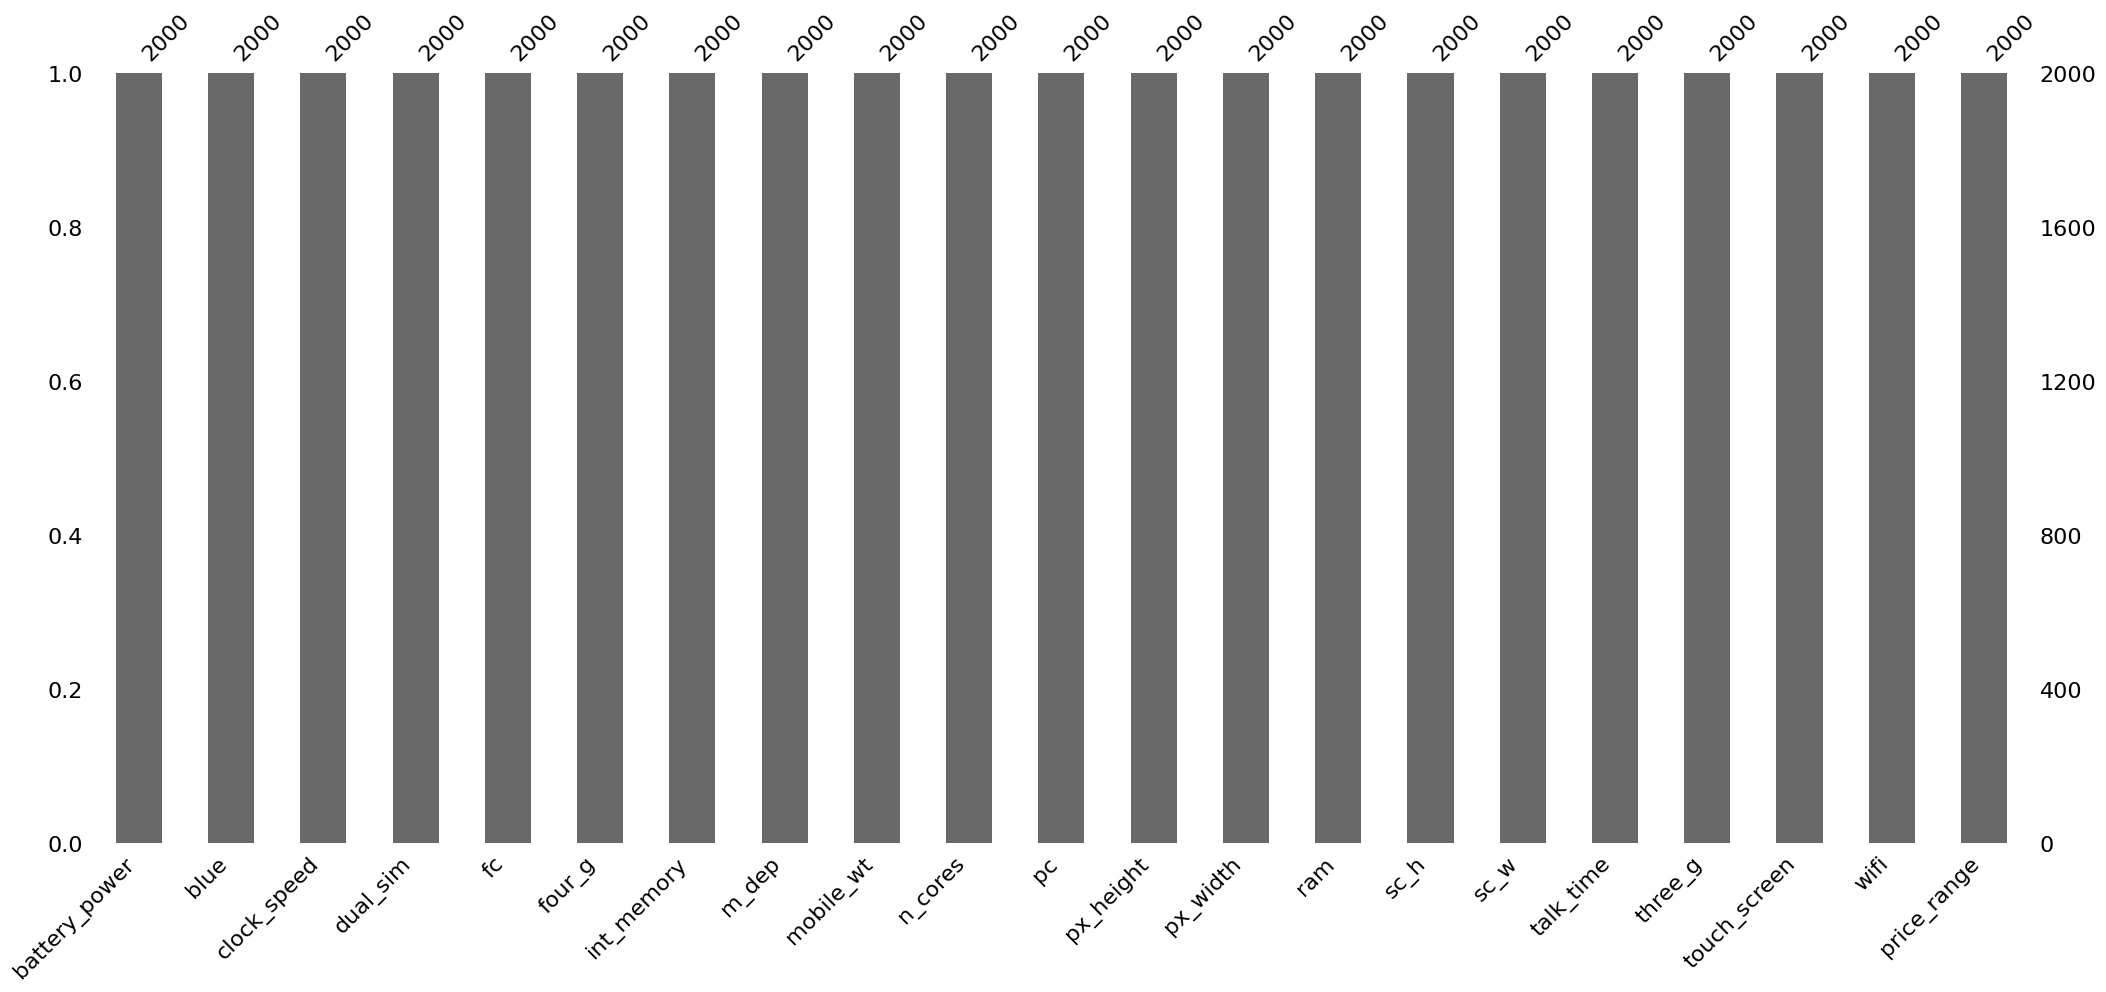

In [7]:
import missingno as msno

msno.bar(df)
plt.show()

In [8]:
df.var()

battery_power    1.930884e+05
blue             2.501001e-01
clock_speed      6.658629e-01
dual_sim         2.500348e-01
fc               1.884813e+01
four_g           2.496626e-01
int_memory       3.292670e+02
m_dep            8.318353e-02
mobile_wt        1.253136e+03
n_cores          5.234197e+00
pc               3.677592e+01
px_height        1.969414e+05
px_width         1.867964e+05
ram              1.176644e+06
sc_h             1.775143e+01
sc_w             1.897820e+01
talk_time        2.985481e+01
three_g          1.817086e-01
touch_screen     2.501161e-01
wifi             2.500760e-01
price_range      1.250625e+00
dtype: float64

In [9]:
df['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

<Axes: >

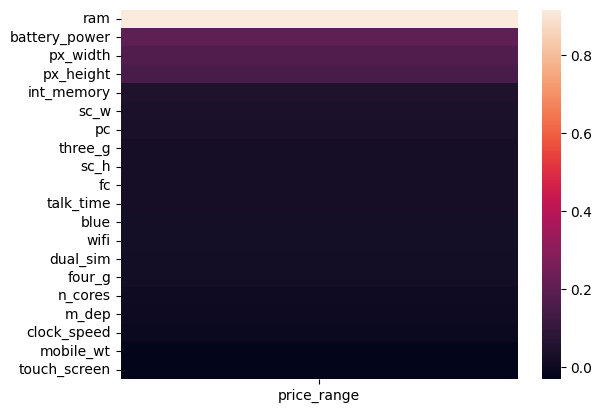

In [10]:
sns.heatmap(df.corr()['price_range'].drop('price_range').to_frame().sort_values('price_range',ascending=False))

<Axes: xlabel='price_range', ylabel='ram'>

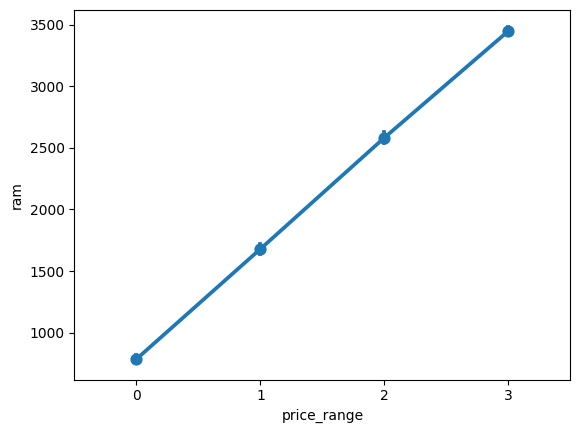

In [11]:
sns.pointplot(data=df,x='price_range',y='ram')

<Axes: xlabel='price_range', ylabel='battery_power'>

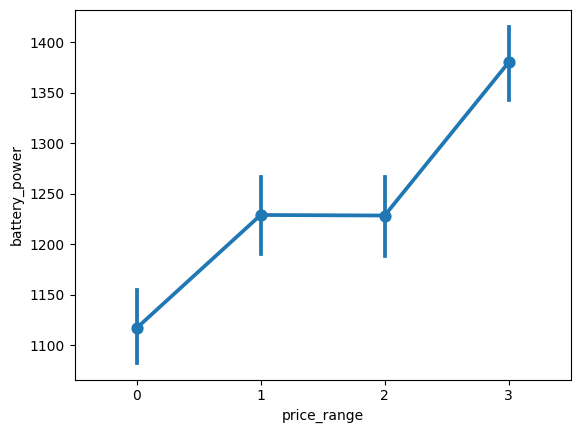

In [12]:
sns.pointplot(data=df,y='battery_power',x=df.price_range)

<Axes: xlabel='price_range', ylabel='px_width'>

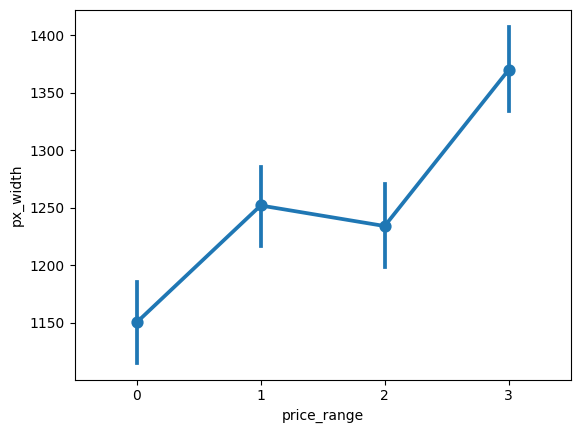

In [13]:
sns.pointplot(data=df,x='price_range',y='px_width')

<Axes: xlabel='price_range', ylabel='px_height'>

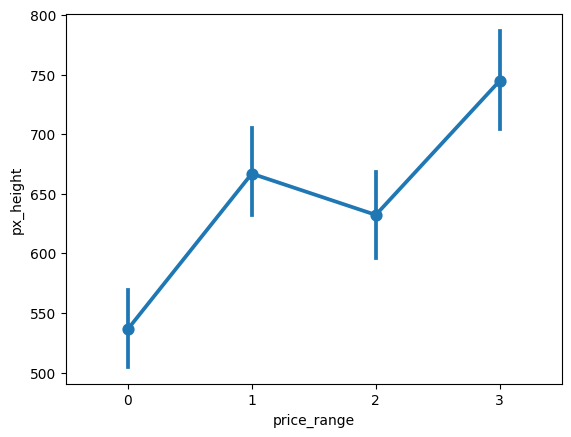

In [14]:
sns.pointplot(data=df,x='price_range',y='px_height')

In [15]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [16]:
binary_columns = ['blue','dual_sim','four_g','three_g','touch_screen','wifi','price_range']

num_columns = [
    'battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
    'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width',
    'ram', 'sc_h', 'sc_w', 'talk_time'
]

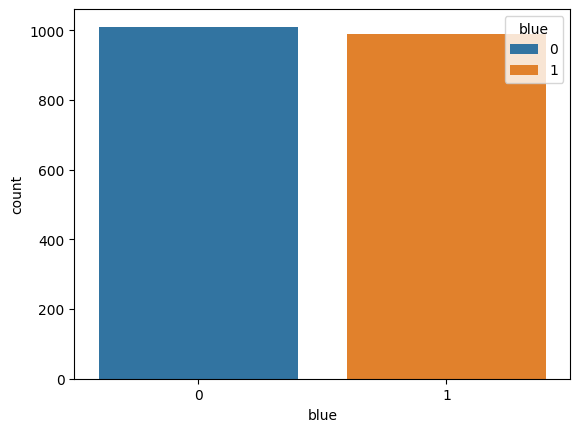

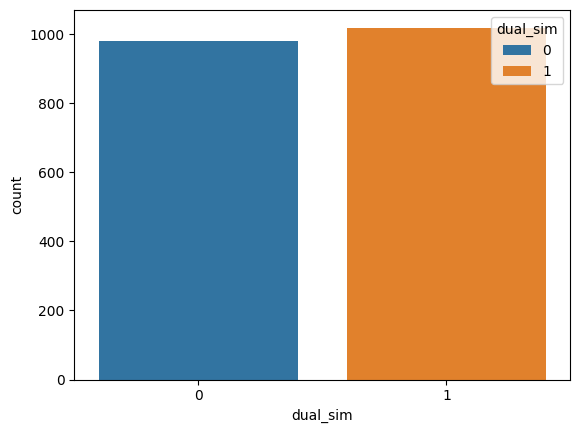

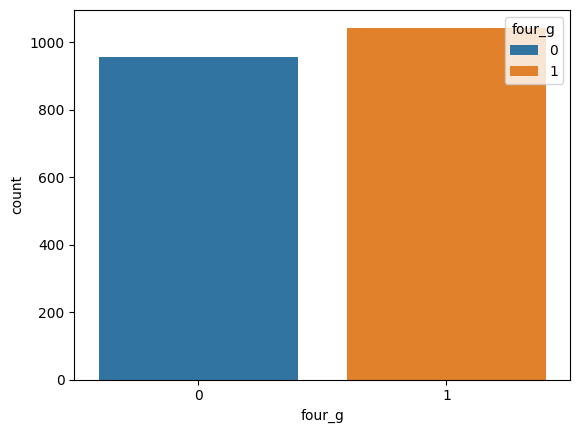

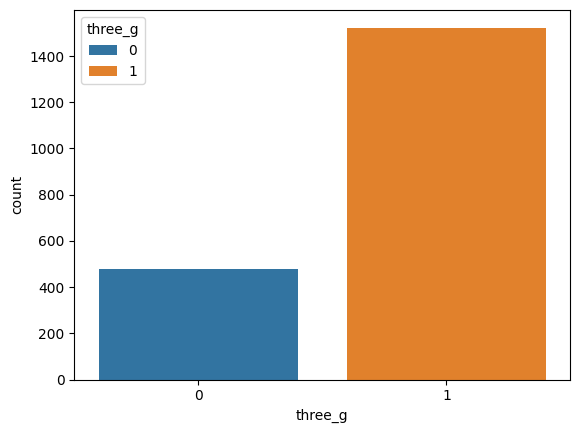

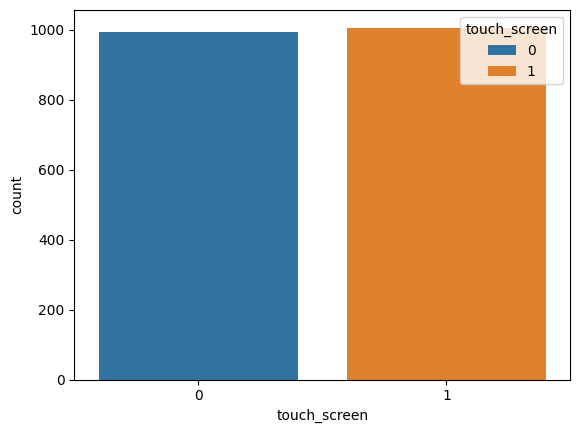

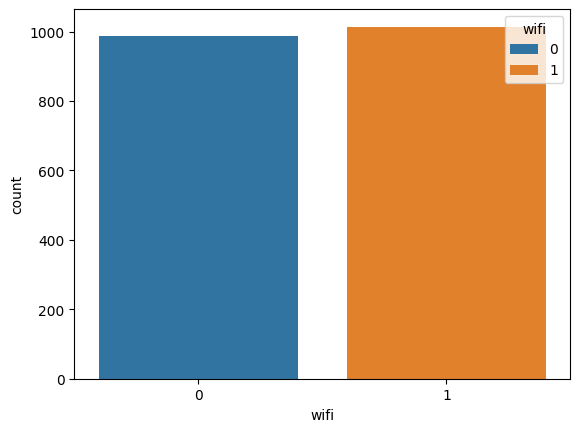

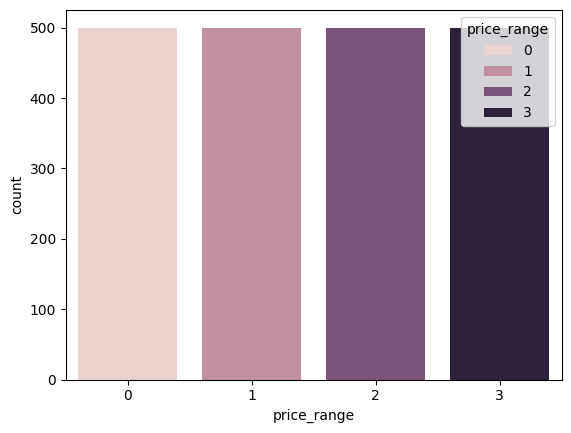

In [17]:
for i in binary_columns:
    sns.countplot(data=df,x=i,hue=i)
    plt.xlabel(i)
    plt.show()

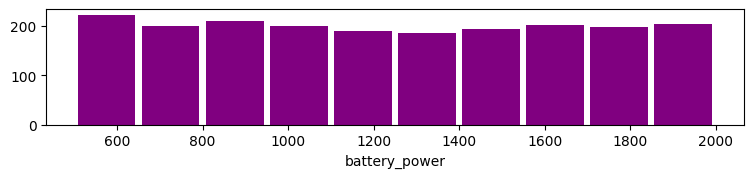

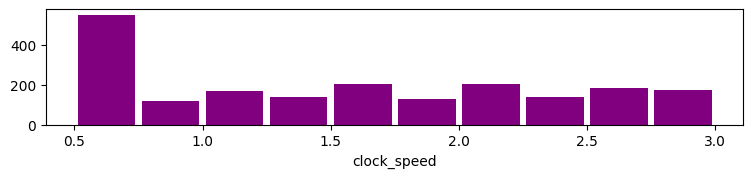

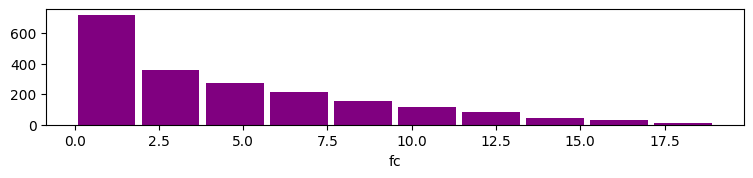

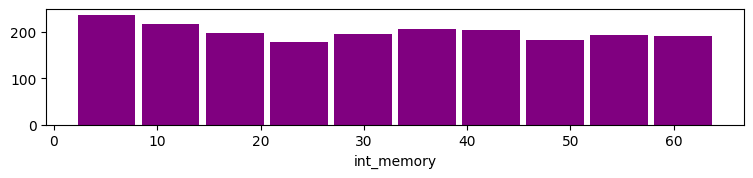

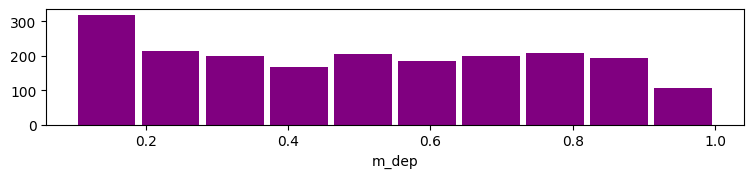

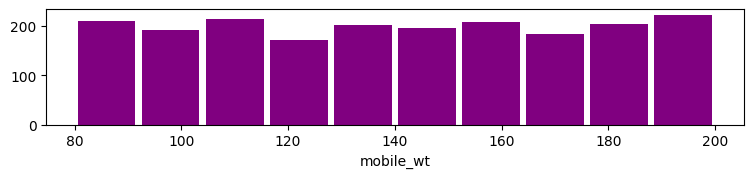

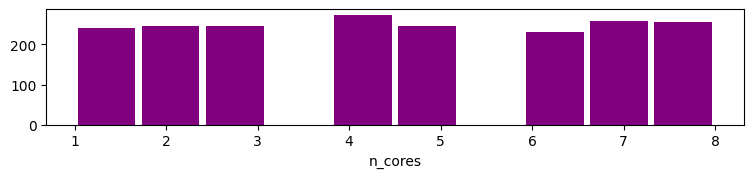

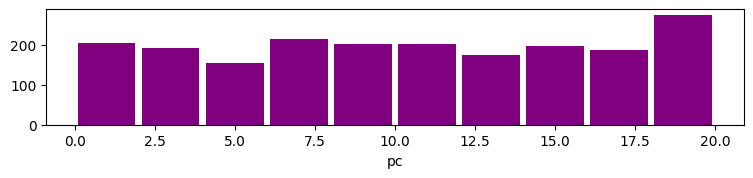

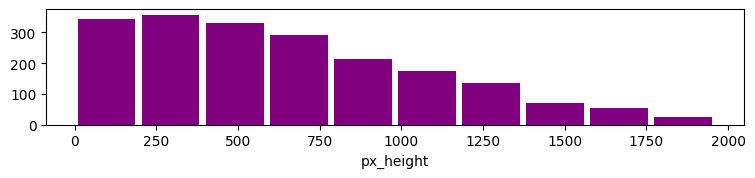

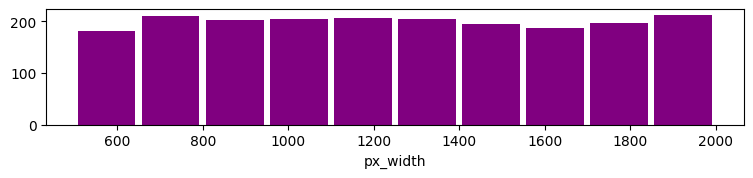

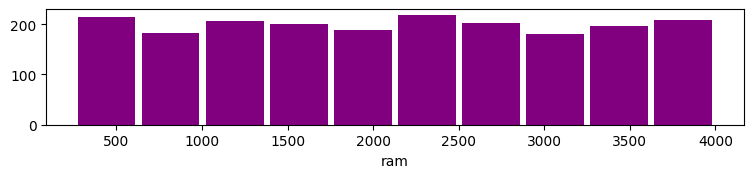

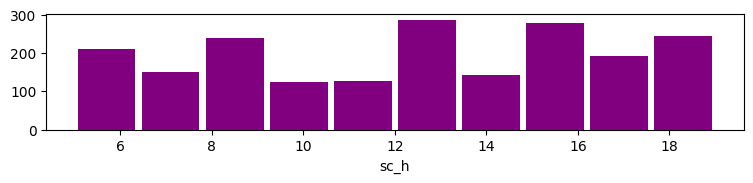

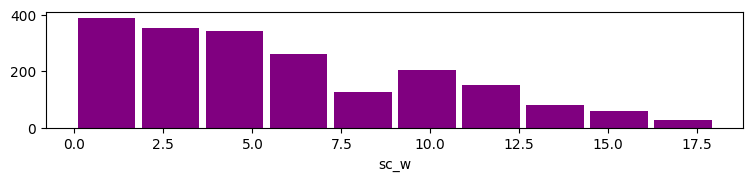

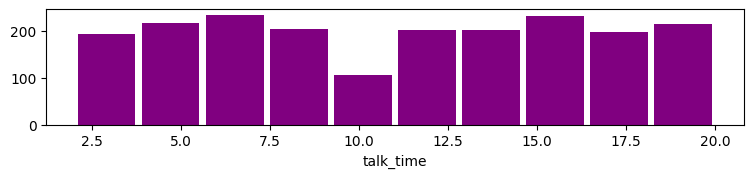

In [18]:
for i in df.drop(df[binary_columns],axis=1):
    fig = plt.figure(figsize=(9,1.5))
    plt.hist(x=df[i],bins=10,color='purple',rwidth=.9)
    plt.xlabel(i)
    plt.show()

<Axes: xlabel='touch_screen', ylabel='ram'>

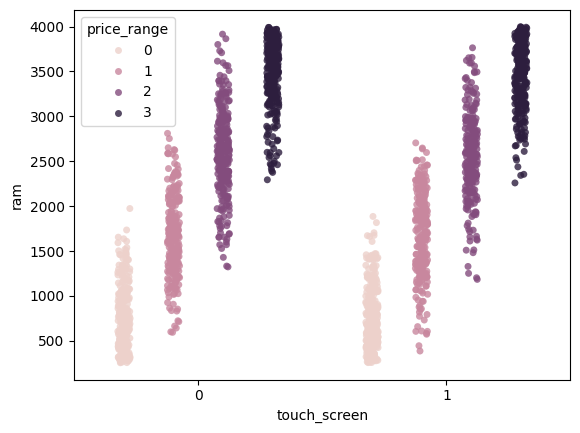

In [19]:
sns.stripplot(data=df,x='touch_screen',y='ram',hue='price_range',dodge=True,jitter=True,alpha=.8)

<Axes: xlabel='four_g', ylabel='ram'>

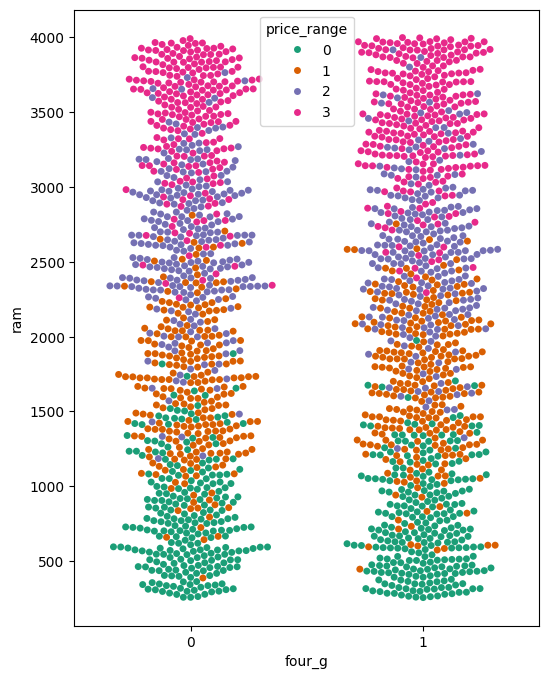

In [33]:
plt.figure(figsize=(6,8))
sns.swarmplot(data=df,x='four_g',y='ram',hue='price_range',palette='Dark2')


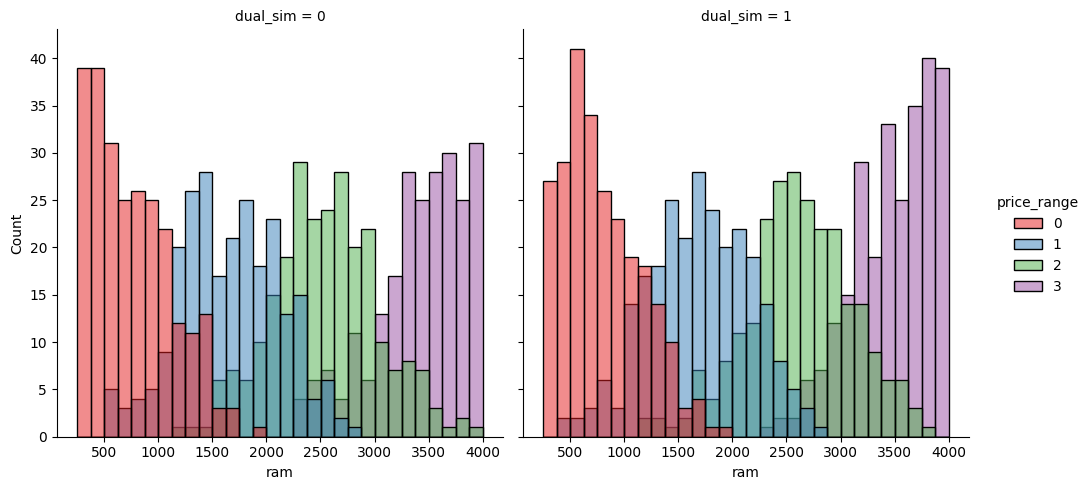

In [36]:
sns.displot(
    data=df,
    x='ram',
    col='dual_sim',
    hue='price_range',
    palette='Set1',
    bins=30,
    height=5
)

In [22]:
x = df.drop('price_range',axis=1)
y = df['price_range']

In [23]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['vid'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features'] = x.columns
vif

,vid,features
0,1.009945,battery_power
1,1.011342,blue
2,1.006025,clock_speed
3,1.011555,dual_sim
4,1.718987,fc
5,1.528509,four_g
6,1.009274,int_memory
7,1.006385,m_dep
8,1.004548,mobile_wt
9,1.008442,n_cores


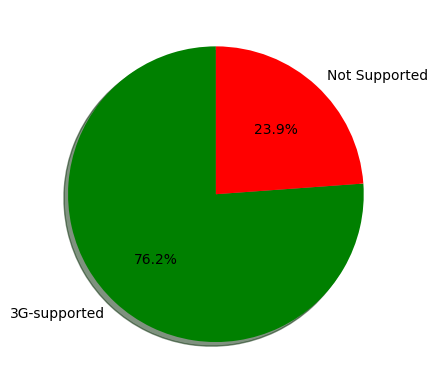

In [25]:

labels = ['3G-supported','Not Supported']
values = df['three_g'].value_counts().values
fig1,ax1 = plt.subplots()
colors = ['green','red']
ax1.pie(values,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

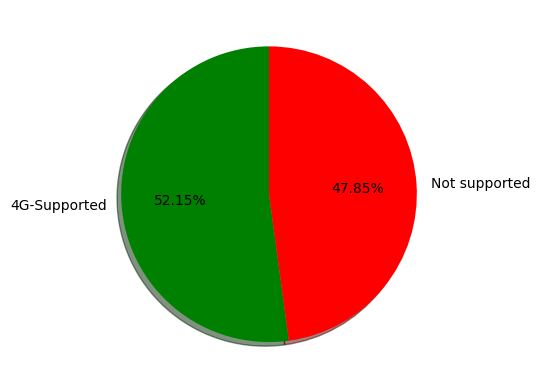

In [51]:
labels = ['4G-Supported','Not supported']
values = df['four_g'].value_counts().values
colors = ['green','red']
plt.pie(values,labels=labels,autopct='%1.2f%%',shadow=True,startangle=90,colors=colors)
plt.show()

Text(0.5, 0, 'Mega Pixels')

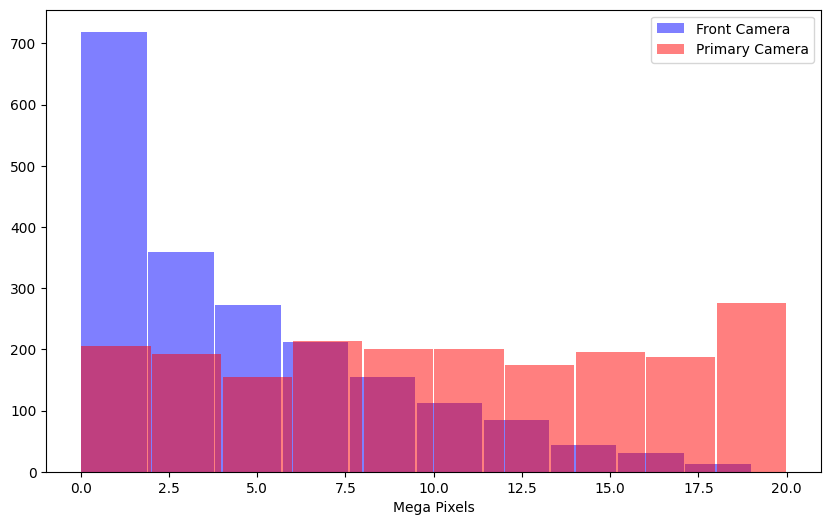

In [73]:
plt.figure(figsize=(10,6))
df['fc'].hist(alpha=.5,color='blue',label='Front Camera',rwidth=.98)
df['pc'].hist(alpha=.5,color='red',label='Primary Camera',rwidth=.98)
plt.legend()
plt.grid(False)
plt.xlabel('Mega Pixels')

In [80]:
from sklearn.model_selection import train_test_split

x_train,x_temp,y_train,y_temp = train_test_split(x,y,test_size=.4,random_state=69,stratify=y)
x_val,x_test,y_val,y_test = train_test_split(x_temp,y_temp,test_size=.5,random_state=69,stratify=y_temp)

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

model = LogisticRegression(penalty='l2',C=.1)
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [106]:
y_val_pred =model.predict(x_val)
y_train_pred = model.predict(x_train)

model_acc = accuracy_score(y_val_pred,y_val)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_val_pred,y_val)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_val_pred,y_val))
print("\nClassification Report:\n%s"%classification_report(y_val_pred,y_val))

Train Set Accuracy:64.75
Test Set Accuracy:63.24999999999999

Confusion Matrix:
[[77 15  0  0]
 [23 54 32  1]
 [ 0 24 45 22]
 [ 0  7 23 77]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80        92
           1       0.54      0.49      0.51       110
           2       0.45      0.49      0.47        91
           3       0.77      0.72      0.74       107

    accuracy                           0.63       400
   macro avg       0.63      0.64      0.63       400
weighted avg       0.63      0.63      0.63       400

